In [47]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
import datetime
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False

In [4]:
# 获取全市场股票列表
stock_list = pd.read_excel('市场股票列表.xlsx')

In [5]:
stock_list

,ts_code,symbol,name,area,industry,cnspell,market,list_date,act_name,act_ent_type
0,000001.SZ,1,平安银行,深圳,银行,payh,主板,19910403,无实际控制人,无
1,000002.SZ,2,万科A,深圳,全国地产,wka,主板,19910129,深圳市人民政府国有资产监督管理委员会,地方国企
2,000004.SZ,4,国华网安,深圳,软件服务,ghwa,主板,19910114,李映彤,民营企业
3,000006.SZ,6,深振业A,深圳,区域地产,szya,主板,19920427,深圳市人民政府国有资产监督管理委员会,地方国企
4,000007.SZ,7,全新好,深圳,其他商业,qxh,主板,19920413,王玩虹,民营企业
...,...,...,...,...,...,...,...,...,...,...
5396,920111.BJ,920111,聚星科技,NaN,NaN,jxkj,北交所,20241111,NaN,NaN
5397,920116.BJ,920116,星图测控,NaN,NaN,xtck,北交所,20250102,NaN,NaN
5398,920118.BJ,920118,太湖远大,NaN,NaN,thyd,北交所,20240822,NaN,NaN
5399,920128.BJ,920128,胜业电气,NaN,NaN,sydq,北交所,20241129,NaN,NaN


In [14]:
stock_list50=stock_list.iloc[1500:2500]
stock_list50

,ts_code,symbol,name,area,industry,cnspell,market,list_date,act_name,act_ent_type
1500,300016.SZ,300016,北陆药业,北京,化学制药,blyy,创业板,20091030,NaN,NaN
1501,300017.SZ,300017,网宿科技,上海,软件服务,wskj,创业板,20091030,NaN,NaN
1502,300018.SZ,300018,中元股份,湖北,电气设备,zygf,创业板,20091030,邓志刚,民营企业
1503,300019.SZ,300019,硅宝科技,四川,化工原料,gbkj,创业板,20091030,NaN,NaN
1504,300020.SZ,300020,*ST银江,浙江,软件服务,styj,创业板,20091030,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2495,301070.SZ,301070,开勒股份,上海,机械基件,klgf,创业板,20210923,卢小波,民营企业
2496,301071.SZ,301071,力量钻石,河南,矿物制品,llzs,创业板,20210924,邵增明,民营企业
2497,301072.SZ,301072,中捷精工,江苏,汽车配件,zjjg,创业板,20210929,魏忠,民营企业
2498,301073.SZ,301073,君亭酒店,浙江,酒店餐饮,jtjd,创业板,20210930,NaN,NaN


In [24]:
# 初始化Tushare
ts.set_token('07b3e45fa6d985836c0bd0fc628253b591304796abb620f6878e2438')
pro = ts.pro_api()

In [6]:
# 获取日线数据
def get_stock_data(ts_code, start_date='20220101', end_date='20251231'):
    df = pro.daily(ts_code=ts_code, start_date=start_date, end_date=end_date)
    df = df.sort_values('trade_date')
    df['trade_date'] = pd.to_datetime(df['trade_date'])
    df.set_index('trade_date', inplace=True)
    return df

In [32]:
current_date = datetime.datetime.now().strftime('%Y%m%d')
current_date

'20250327'

In [35]:
df = pro.daily(ts_code='002219.SZ', start_date='20220101', end_date=current_date)
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,002219.SZ,20250327,2.56,2.60,2.53,2.58,2.56,0.02,0.7813,378652.00,97363.147
1,002219.SZ,20250326,2.54,2.57,2.53,2.56,2.55,0.01,0.3922,296476.75,75792.865
2,002219.SZ,20250325,2.54,2.56,2.50,2.55,2.54,0.01,0.3937,396335.00,100357.972
3,002219.SZ,20250324,2.54,2.62,2.50,2.54,2.64,-0.10,-3.7879,818193.50,208006.205
4,002219.SZ,20250321,2.70,2.71,2.63,2.64,2.69,-0.05,-1.8587,471271.05,125508.250
...,...,...,...,...,...,...,...,...,...,...,...
774,002219.SZ,20220110,3.56,3.61,3.56,3.58,3.59,-0.01,-0.2786,30626.00,10976.127
775,002219.SZ,20220107,3.62,3.62,3.58,3.59,3.61,-0.02,-0.5540,41712.03,14986.954
776,002219.SZ,20220106,3.52,3.71,3.48,3.61,3.54,0.07,1.9774,68229.38,24699.824
777,002219.SZ,20220105,3.61,3.61,3.51,3.54,3.61,-0.07,-1.9391,62488.00,22302.971


In [42]:
df=df.sort_values('trade_date')

In [37]:
df['trade_date']=pd.to_datetime(df['trade_date'])

In [38]:
df.set_index('trade_date', inplace=True)

In [43]:
df

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2022-01-04,002219.SZ,3.64,3.66,3.58,3.61,3.66,-0.05,-1.3661,62580.00,22645.424
2022-01-05,002219.SZ,3.61,3.61,3.51,3.54,3.61,-0.07,-1.9391,62488.00,22302.971
2022-01-06,002219.SZ,3.52,3.71,3.48,3.61,3.54,0.07,1.9774,68229.38,24699.824
2022-01-07,002219.SZ,3.62,3.62,3.58,3.59,3.61,-0.02,-0.5540,41712.03,14986.954
2022-01-10,002219.SZ,3.56,3.61,3.56,3.58,3.59,-0.01,-0.2786,30626.00,10976.127
...,...,...,...,...,...,...,...,...,...,...
2025-03-21,002219.SZ,2.70,2.71,2.63,2.64,2.69,-0.05,-1.8587,471271.05,125508.250
2025-03-24,002219.SZ,2.54,2.62,2.50,2.54,2.64,-0.10,-3.7879,818193.50,208006.205
2025-03-25,002219.SZ,2.54,2.56,2.50,2.55,2.54,0.01,0.3937,396335.00,100357.972


In [49]:
df.to_excel('002219.SZ.xlsx')

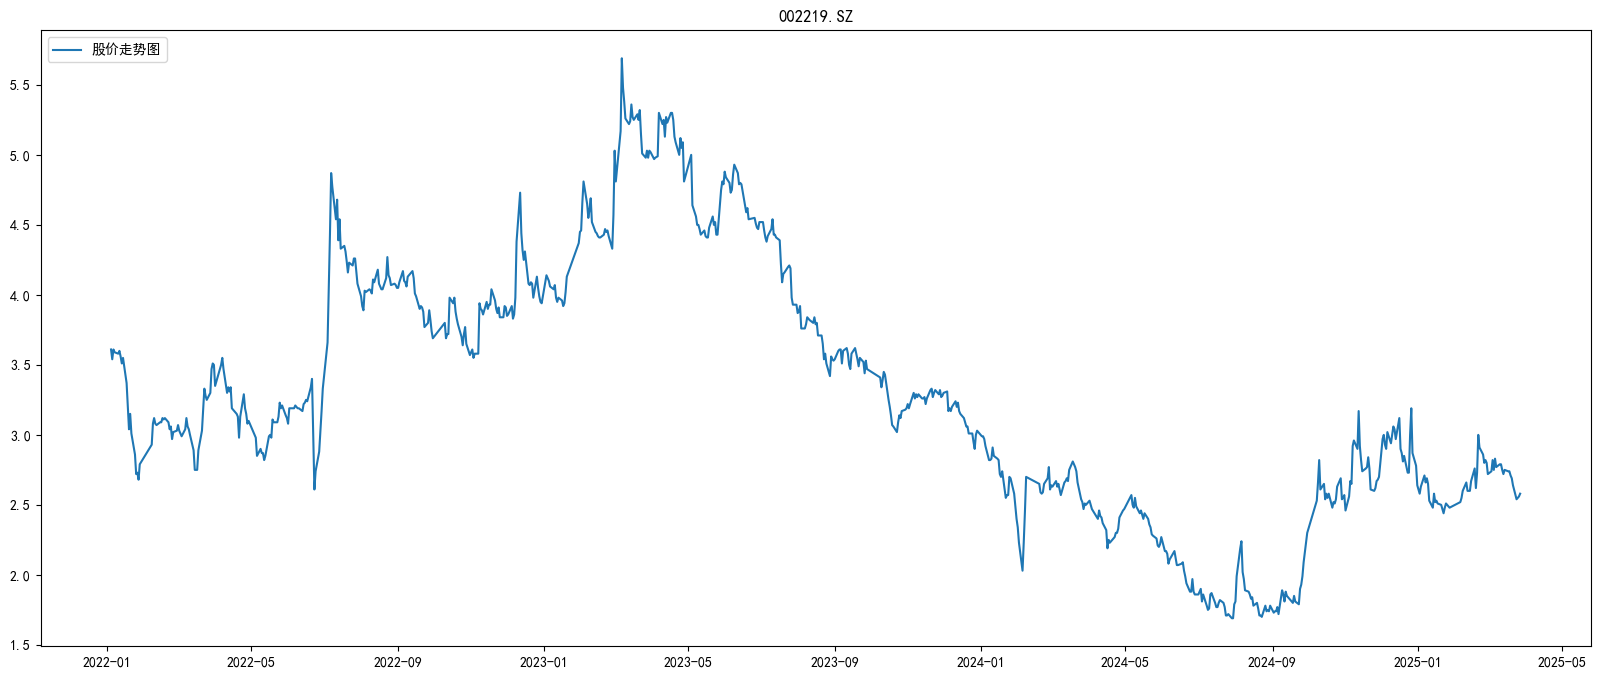

In [51]:
plt.figure(figsize=(20,8))
plt.title('002219.SZ')
plt.plot(df.index, df['close'].values, label='股价走势图')
plt.legend(loc='upper left')

技术指标计算

In [7]:
def calculate_technical_indicators(df, window=30):
    # 移动平均线
    df['MA20'] = df['close'].rolling(window=20).mean()
    df['MA60'] = df['close'].rolling(window=60).mean()
    
    # RSI计算
    delta = df['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    # 布林带
    df['Middle Band'] = df['close'].rolling(window=20).mean()
    df['Upper Band'] = df['Middle Band'] + 1.96*df['close'].rolling(20).std()
    df['Lower Band'] = df['Middle Band'] - 1.96*df['close'].rolling(20).std()
    
    return df

In [52]:
df['MA20']=df['close'].rolling(20).mean()
df['MA60']=df['close'].rolling(60).mean()

In [53]:
df

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount,MA20,MA60
trade_date,,,,,,,,,,,,
2022-01-04,002219.SZ,3.64,3.66,3.58,3.61,3.66,-0.05,-1.3661,62580.00,22645.424,NaN,NaN
2022-01-05,002219.SZ,3.61,3.61,3.51,3.54,3.61,-0.07,-1.9391,62488.00,22302.971,NaN,NaN
2022-01-06,002219.SZ,3.52,3.71,3.48,3.61,3.54,0.07,1.9774,68229.38,24699.824,NaN,NaN
2022-01-07,002219.SZ,3.62,3.62,3.58,3.59,3.61,-0.02,-0.5540,41712.03,14986.954,NaN,NaN
2022-01-10,002219.SZ,3.56,3.61,3.56,3.58,3.59,-0.01,-0.2786,30626.00,10976.127,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-21,002219.SZ,2.70,2.71,2.63,2.64,2.69,-0.05,-1.8587,471271.05,125508.250,2.7615,2.693333
2025-03-24,002219.SZ,2.54,2.62,2.50,2.54,2.64,-0.10,-3.7879,818193.50,208006.205,2.7455,2.688833
2025-03-25,002219.SZ,2.54,2.56,2.50,2.55,2.54,0.01,0.3937,396335.00,100357.972,2.7330,2.683833


In [56]:
delta=df['close'].diff()

In [57]:
delta

trade_date
2022-01-04     NaN
2022-01-05   -0.07
2022-01-06    0.07
2022-01-07   -0.02
2022-01-10   -0.01
              ... 
2025-03-21   -0.05
2025-03-24   -0.10
2025-03-25    0.01
2025-03-26    0.01
2025-03-27    0.02
Name: close, Length: 779, dtype: float64

低位筛选逻辑

In [8]:
def find_low_position_stocks(df):
    latest = df.iloc[-1]
    
    # 价格条件
    price_cond = (
        (latest['close'] < df['close'].quantile(0.2)) &  # 低于历史20%分位
        (latest['close'] < latest['MA20']) &             # 低于20日均线
        (latest['close'] < latest['Lower Band'])         # 低于布林带下轨
    )
    # 动量条件
    momentum_cond = (
        (latest['RSI'] < 30) &                           # RSI超卖
        (latest['vol'] > df['vol'].rolling(10).mean().iloc[-1]) # 成交量放大
    )
    
    return price_cond & momentum_cond

执行筛选

In [15]:
def main():
    selected_stocks = []
    
    for ts_code in stock_list50['ts_code']:
        try:
            df = get_stock_data(ts_code)
            if len(df) < 60:  # 确保足够数据量
                continue
                
            df = calculate_technical_indicators(df)
            
            if find_low_position_stocks(df):
                selected_stocks.append(ts_code)
                
        except Exception as e:
            print(f"Error processing {ts_code}: {str(e)}")
    
    print("筛选出的低位个股：", selected_stocks)

if __name__ == "__main__":
    main()

筛选出的低位个股： []
